In [1]:
# This notebook is used for debugging the code

In [2]:
from typing_extensions import TypedDict

In [3]:
class State(TypedDict):
    graph_info: str

In [19]:
def start_play(state: State):
    print("start_play node has been called ")
    return {"graph_info": state["graph_info"]+ " I am planning to play"}

def cricket(state: State):
    print("cricket node has been called ")
    return {"graph_info": state["graph_info"]+ " Cricket"}

def badminton(state: State):
    print("badminton node has been called ")
    return {"graph_info": state["graph_info"]+ " Badminton"}

In [20]:
import random
from typing import Literal

def random_play(state: State) -> Literal["cricket", "badminton"]:
    print("random_play node has been called ")
    graph_info = state["graph_info"]
    if "dhinesh" in str(state['graph_info']):
        return "cricket"
    elif "optimus" in str(state['graph_info']):
        return "badminton"
    else:
        return "cricket"

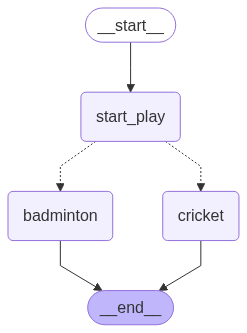

In [21]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

graph = StateGraph(State)
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("badminton",END)

graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [22]:
graph_builder.invoke({"graph_info": "test"})

start_play node has been called 
random_play node has been called 
cricket node has been called 


{'graph_info': 'test I am planning to play Cricket'}

In [23]:
## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [24]:
class AgentState(TypedDict):
    messages: Annotated[list, add_messages]


In [27]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

llm = ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BkMX12KpMYGXcv6abVp907falJuHt', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--403ff196-8c22-4fb7-9c75-8f18b5494057-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [30]:
from langchain_groq import ChatGroq
llm1 = ChatGroq(model="Gemma2-9b-It")
response = llm1.invoke("Hello")
response.content

'Hello! 👋\n\nHow can I help you today? 😊\n'

In [31]:
def superbot(state: AgentState) -> AgentState:
    return {"messages": [llm1.invoke(state["messages"])]}

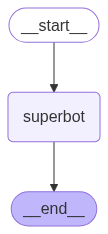

In [32]:
graph = StateGraph(AgentState)
graph.add_node("superbot", superbot)
graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)
graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [33]:
graph_builder.invoke({'messages':"Hi,My name is Optimus And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Optimus And I like cricket', additional_kwargs={}, response_metadata={}, id='dccd15d6-9f79-4bce-94ed-c4356301ed7d'),
  AIMessage(content="Hello Optimus! It's nice to meet you.  \n\nThat's great you like cricket! It's a fantastic sport. What do you enjoy most about it? 🏏 \n\nDo you have a favorite team or player? 😊\n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 19, 'total_tokens': 73, 'completion_time': 0.098181818, 'prompt_time': 0.001876623, 'queue_time': 0.015360544, 'total_time': 0.100058441}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--f5c7613f-6635-41ef-947c-0246bd6e5aef-0', usage_metadata={'input_tokens': 19, 'output_tokens': 54, 'total_tokens': 73})]}